## 7.1 ニューロンモデル

ニューラルネットワークはニューロンモデルを単位として構築される。

### 7.1.1 神経細胞

シナプス伝達強度が高いと、膜電位が閾値を超えて次の神経細胞にパルスが伝達される。

### 7.1.2 ニューロンモデル

- 出力は入力総和の平面を活性化関数に通したもの。
- 出力2クラスの分類：シグモイド関数  
    出力3クラスの分類：ソフトマックス関数

## 7.2 ニューラルネットワークモデル

### 7.2.1 ２層フィードフォワードニューラルネット

- ニューラルネットワークモデル  
    ニューロンの集合体のモデル
- フィードフォワードニューラルネット  
    信号が一方向のみに流れるモデル
- ダミーニューロン：バイアス項

### 7.2.2 ２層フィードフォワードニューラルネットの実装

In [1]:
import numpy as np

In [2]:
# データ生成
np.random.seed(seed=1) # 乱数を固定
N = 200 # データの数
K = 3 # 分布の数
T = np.zeros((N,3), dtype=np.uint8)
X = np.zeros((N,2))
X_range0 = [-3, 3] # X0の範囲、表示用
X_range1 = [-3, 3] # X1の範囲、表示用
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 分布の中心
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 分布の分散
Pi = np.array([0.4, 0.8, 1]) # 各分布への割合

'''
np.random.randで0~1の乱数生成、wkに代入
→wkがPiより小さいか確認
→ゼロ行列であるT[n,k]に1を代入
→代入したらループを出てまた新たな乱数を生成
'''
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T[n, k] = 1
            break
    '''
    テストデータを生成
    T[n,:]==1→0か１
    Sig[T[n, :] == 1, k]→Sig[0~1, 0~2]
    Mu[T[n, :] == 1, k]→Mu[0~1, 0~2]
    '''
    for k in range(2):
        X[n, k] = np.random.randn() * Sig[T[n, :] == 1, k] + Mu[T[n, :] == 1, k]

In [3]:
# ２分類のデータをテスト・訓練データに分割
TrainingRatio = 0.5
X_n_training = int(N * TrainingRatio)
X_train = X[:X_n_training, :]
X_test = X[X_n_training:, :]
T_train = T[:X_n_training, :]
T_test = T[X_n_training: ,:]

In [4]:
# データを'class_data.npz'に保存
np.savez('class_data.npz', X_train=X_train, T_train=T_train, X_test=X_test, T_test=T_test, X_range0=X_range0, X_range1=X_range1)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# データの図示
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i]==1, 0], x[t[:, i] == 1, 1], linestyle='none', marker='o', markeredgecolor='black', color=c[i], alpha=0.8)
    plt.grid(True)

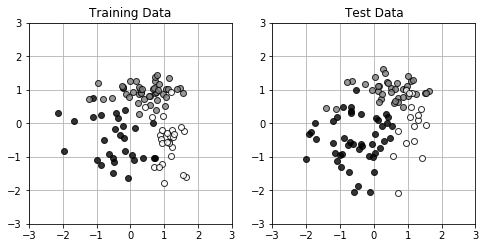

In [6]:
plt.figure(1, figsize=(8, 3.7))
plt.subplot(1, 2, 1)
Show_data(X_train, T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')
plt.subplot(1, 2, 2)
Show_data(X_test, T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')
plt.show()

- ３クラス分類問題を解いていく。  
- FNN  
    2層のフィードフォワードニューラルネットワークを定義する関数  
    入力xに対してyを出力  

In [7]:
# シグモイド関数
def Sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

In [8]:
# ネットワーク
'''
x：入力データ
N、D：入力データの次元
wv：重み
M：中間層の数
K：出力yの次元
'''
def FNN(wv, M, K, x):
    N, D = x.shape  # 次元入力
    
    w = wv[:M * (D + 1)]  # 中間層ニューロンへの重み
    w = w.reshape(M,(D + 1))
    
    v = wv[M * (D + 1):]  # 出力層ニューロンへの重み
    v = v.reshape(K, (M + 1))
    
    b = np.zeros((N, M + 1))  # 中間層ニューロンへの入力総和
    z = np.zeros((N, M + 1))  # 中間層ニューロンの出力
    
    a = np.zeros((N, K)) # 出力層ニューロンの入力総和
    y = np.zeros((N, K))  # 出力層ニューロンの出力
    
    for n in range(N):
        for m in range(M):
            # 中間層の計算
            b[n, m] = np.dot(w[m, :], np.r_[x[n, :], 1])
            z[n, m] = Sigmoid(b[n, m])
        # 出力層の計算
        z[n, M] = 1  # ダミーニューロン
        wkz = 0
        for k in range(K):
            a[n, k] = np.dot(v[k, :], z[n, :])
            wkz = wkz + np.exp(a[n, k])
        for k in range(K):
            y[n, k] = np.exp(a[n, k]) / wkz
    return y, a, z, b

In [9]:
# test
WV = np.ones(15)
M = 2
K = 3
FNN(WV, M, K, X_train[:2, :])

(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[2.6971835 , 2.6971835 , 2.6971835 ],
        [1.49172649, 1.49172649, 1.49172649]]),
 array([[0.84859175, 0.84859175, 1.        ],
        [0.24586324, 0.24586324, 1.        ]]),
 array([[ 1.72359839,  1.72359839,  0.        ],
        [-1.12079826, -1.12079826,  0.        ]]))

### 7.2.3 数値微分法

In [10]:
# 平均交差エントロピー誤差
def CE_FNN(wv, M, K, x, t):
    N, D = x.shape
    y, a, z, b = FNN(wv, M, K, x)
    ce = -np.dot(t.reshape(-1), np.log(y.reshape(-1))) / N
    return ce

In [11]:
WV = np.ones(15)
M = 2
K = 3
CE_FNN(WV, M, K, X_train[:2, :], T_train[:2, :])

1.0986122886681098

勾配法を使って誤差関数の解を求めるために、近似で微分値を求める

In [12]:
# 数値微分
def dCE_FNN_num(wv, M, K, x, t):
    epsilon = 0.001
    dwv = np.zeros_like(wv)
    for iwv in range(len(wv)):
        wv_modified = wv.copy()
        '''x*からマイナスε地点の誤差'''
        wv_modified[iwv] = wv[iwv] - epsilon
        mse1 = CE_FNN(wv_modified, M, K, x, t)
        '''x*からプラスε地点の誤差'''
        wv_modified[iwv] = wv[iwv] + epsilon
        mse2 = CE_FNN(wv_modified, M, K, x, t)
        '''近似式'''
        dwv[iwv] = (mse2 - mse1) / (2 * epsilon)
    return dwv

In [13]:
# dWV（２層の重みを偏微分）の表示
def Show_WV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[:M * 3], align='center', color='black')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:], align='center', color='cornflowerblue')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)

[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


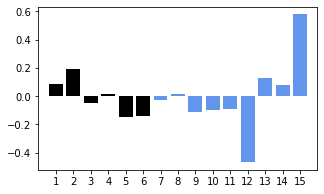

In [14]:
# 値の入力
M = 2
K = 3
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)
dWV = dCE_FNN_num(WV, M, K, X_train[:2, :], T_train[:2, :])
print(dWV)
plt.figure(1, figsize=(5, 3))
Show_WV(dWV, M)
plt.show()

### 7.2.4 数値微分法による勾配法

In [15]:
import time

In [16]:
# 数値微分を使った勾配法で学習誤差を求める
def Fit_FNN_num(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wv = wv_init
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    for i in range(n):
        wv = wv - alpha * dCE_FNN_num(wv, M , K, x_train, t_train)
        err_train[i] = CE_FNN(wv, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wv, M, K, x_test, t_test)
        wv_hist[i, :] = wv
    return wv, wv_hist, err_train, err_test

In [17]:
# 数値入力
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000
alpha = 0.5
WV, WV_hist, Err_train, Err_test = Fit_FNN_num(WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print('Calculation time:{0:.3f} sec'.format(calculation_time))

Calculation time:142.866 sec


In [18]:
WV_init

array([ 0.01624345, -0.00611756, -0.00528172, -0.01072969,  0.00865408,
       -0.02301539,  0.01744812, -0.00761207,  0.00319039, -0.0024937 ,
        0.01462108, -0.02060141, -0.00322417, -0.00384054,  0.01133769])

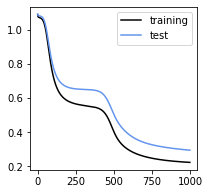

In [19]:
# 学習誤差の表示
plt.figure(1, figsize=(3, 3))
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label='test')
plt.legend()
plt.show()

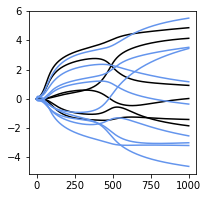

In [20]:
# 重みの時間発展の表示
plt.figure(1, figsize=(3,3))
plt.plot(WV_hist[:, : M  * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
plt.show()

In [21]:
# 境界線表示関数
def show_FNN(wv, M, K):
    xn = 60 # 等高線表示の解像度
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, (xn * xn, 1)), np.reshape(xx1, (xn *xn, 1))] # 配列の結合
    y, a, z, b = FNN(wv, M, K, x)
    plt.figure(1, figuresize=(4,4))
    for ic in range(K):
        f = y[:, ic]
        f = f.reshape(xn, xn)
        f = f.T
        cont = plt.contour(xx0, xx1, f, levels=[0.5, 0.9], colors=['cornflowerblue', 'black'])
        cont.clabel(fmt='%.1f',fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)

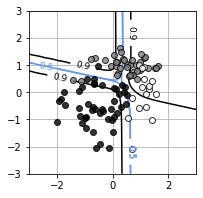

In [22]:
plt.figure(1, figsize=(3,3))
Show_data(X_test, T_test)
show_FNN(WV, M, K)
plt.show()

### 7.2.5 誤差逆伝播法

###  7.2.6 $\frac{\partial E}{\partial V_{kj}}$を求める

###  7.2.7 $\frac{\partial E}{\partial W_{ji}}$を求める

### 7.2.8 誤差逆伝播法の実装

In [23]:
# 解析的微分
def dCE_FNN(wv, M, K, x, t):
    N, D = x.shape
    # wvをwとvに戻す
    w = wv[:M * (D + 1)]
    w = w.reshape(M, (D + 1))
    v = wv[M * (D + 1):]
    v = v.reshape((K, M + 1))
    
    y, a, z, b = FNN(wv, M, K, x)
    # 出力変数の準備
    dwv = np.zeros_like(wv)
    dw = np.zeros((M, D + 1))
    dv = np.zeros((K, M + 1))
    delta1 = np.zeros(M) # 一層目誤差
    delta2 = np.zeros(K) # 二層目誤差
    for n in range(N):
        # 出力層の誤差を求める
        for k in range(K):
            delta2[k] = (y[n, k] - t[n, k])
        # 中間層の誤差を求める
        for j in range(M):
            delta1[j] = z[n, j] * (1 - z[n, j]) * np.dot(v[:, j], delta2)
        # vの勾配dvを求める
        for k in range(K):
            dv[k, :] = dv[k, :] + delta2[k] * z[n, :] / N
        # wの勾配dwを求める
        for j in range(M):
            dw[j, :] = dw[j, :] + delta1[j] * np.r_[x[n, :], 1] / N
    # dwとdvを合体させてdwvとする
    dwv = np.c_[dw.reshape((1, M * (D + 1))), dv.reshape((1, K * (M + 1)))]
    dwv = dwv.reshape(-1)
    return dwv

In [24]:
# Show dWV
def Show_dWV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[:M * 3], align='center', color='black')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:], align='center', color='cornflowerblue')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)

analytical dWV
[ 0.08848131  0.19158    -0.051398    0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115649 -0.10104422 -0.09427964 -0.46855604
  0.13096434  0.08076649  0.57971253]
numerical dWV
[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


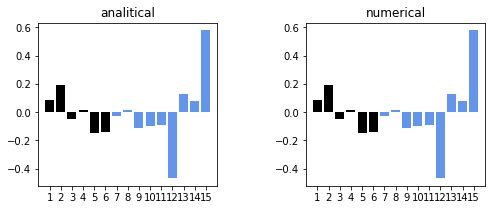

In [25]:
# 動作確認
M = 2
K = 3
N = 2
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)

dWV_ana = dCE_FNN(WV, M, K, X_train[:N, :],T_train[:N, :])
print('analytical dWV')
print(dWV_ana)

dWV_num = dCE_FNN_num(WV, M, K, X_train[:N, :], T_train[:N, :])
print('numerical dWV')
print(dWV_num)

plt.figure(1, figsize=(8, 3))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
Show_dWV(dWV_ana, M)
plt.title('analitical')

plt.subplot(1, 2, 2)
Show_dWV(dWV_num, M)
plt.title('numerical')
plt.show()

In [26]:
# 解析的微分を使った勾配法
def Fit_FNN(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wv = wv_init.copy()
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    for i in range(n):
        wv = wv - alpha * dCE_FNN(wv, M, K, x_train, t_train)
        err_train[i] = CE_FNN(wv, M, K, x_train, t_train) 
        err_test[i] = CE_FNN(wv, M, K, x_test, t_test)
        wv_hist[i, :] = wv
    return wv, wv_hist, err_train, err_test

In [27]:
stratTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000
alpha = 0.5

WV, WV_hist, Err_train, Err_test = Fit_FNN(WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print('Calculation time:{0:.3f} sec'.format(calculation_time))

Calculation time:161.878 sec


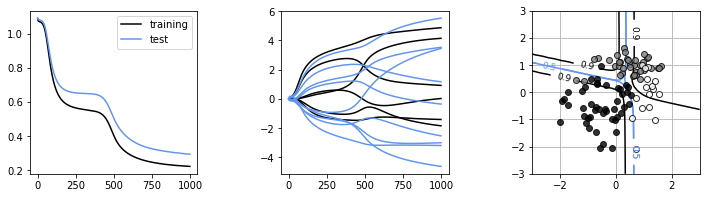

In [28]:
plt.figure(1, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)

# 学習誤差の表示
plt.subplot(1, 3, 1)
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label='test')
plt.legend()

# 重みの時間発展の表示
plt.subplot(1, 3, 2)
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')

# 境界線の表示
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
M = 2
K = 3
show_FNN(WV, M, K)
plt.show()

### 7.2.9 学習後のニューロンの特性

In [29]:
from mpl_toolkits.mplot3d import Axes3D

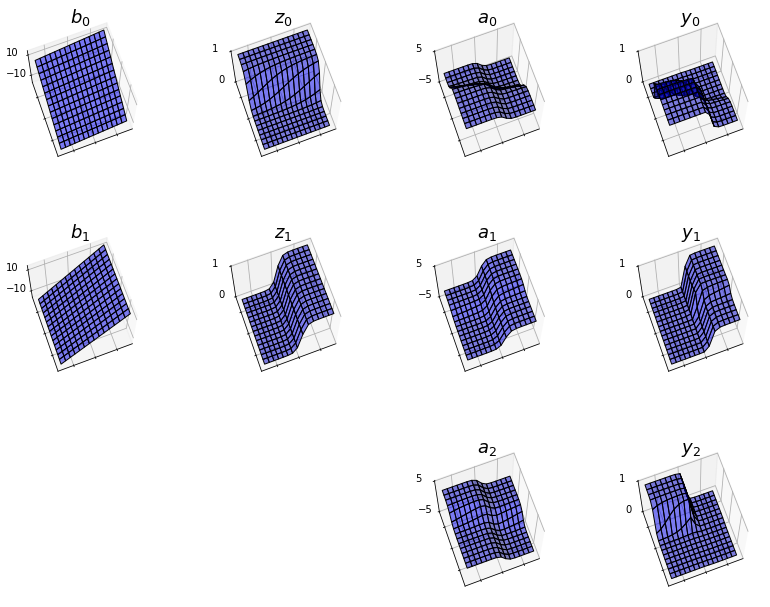

In [30]:
def show_activation3d(ax, v,  v_ticks, title_str):
    f = v.copy()
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f, color='blue', edgecolor='black', rstride=1, cstride=1, alpha=0.5)
    ax.view_init(70, -110)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticks(v_ticks)
    ax.set_title(title_str, fontsize=18)
    
M = 2
K = 3
xn = 15 # 等高線表示の解像度
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, (xn * xn, 1)), np.reshape(xx1, (xn * xn, 1))]
y, a, z, b = FNN(WV, M, K, x)

fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom= 0.05, right=0.95, top=0.95, wspace=0.4, hspace=0.4)

for m in range(M):
    ax = fig.add_subplot(3, 4, 1 + m * 4, projection='3d')
    show_activation3d(ax, b[:, m], [-10, 10], '$b_{0:d}$'.format(m))
    ax = fig.add_subplot(3, 4, 2 + m * 4, projection='3d')
    show_activation3d(ax, z[:, m], [0, 1], '$z_{0:d}$'.format(m))
    
for k in range(K):
    ax = fig.add_subplot(3, 4, 3 + k * 4, projection='3d')
    show_activation3d(ax, a[:, k], [-5, 5], '$a_{0:d}$'.format(k))
    ax = fig.add_subplot(3, 4, 4 + k * 4, projection='3d')
    show_activation3d(ax, y[:, k], [0, 1], '$y_{0:d}$'.format(k))
    
plt.show()

## 7.3 Kerasでニューラルネットワークモデル

### 7.3.1 ２層フィードフォワードニューラルネット

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(1)
import keras.optimizers
from keras.models import Sequential
from keras.layers.core import Dense, Activation

import warnings
warnings.simplefilter('ignore')

In [7]:
outfile = np.load('class_data.npz')
X_train = outfile['X_train']
T_train = outfile['T_train']
X_test = outfile['X_test']
T_test = outfile['T_test']
X_range0 = outfile['X_range0']
X_range1 = outfile['X_range1']

In [8]:
# データの図示
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], linestyle='none', marker='o', markeredgecolor='black', color=c[i], alpha=0.8)
    plt.grid(True)

In [9]:
# 乱数の初期化
np.random.seed(1)

# Sequentialモデルの表示作成
model = Sequential()

# モデルに層を加える
# Dence(ニューロン数, input_dim=入力次元, activation=活性化関数, kernel_initializer=重みパラメータの初期値を一様乱数で決める)
# なお、ダミー入力はデフォルトで定義
model.add(Dense(2, input_dim=2, activation='sigmoid', kernel_initializer='uniform'))
model.add(Dense(3, activation='softmax', kernel_initializer='uniform'))

# 学習方法の設定
# lr：学習率
sgd = keras.optimizers.SGD(lr=0.5, momentum=0.0, decay=0.0, nesterov=False)

# 学習方法の設定→modelに渡す
# metricsを指定することで、学習の評価として正解率も計算する
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# 学習
startTime = time.time()
# epochs：全データを学習に使う回数
# batch_size：１ステップ分の勾配を計算するのに使う学習データの数
# verbose：学習の進行状況を表示しない（０）
# validation_data：評価用データの指定
history = model.fit(X_train, T_train, epochs=1000, batch_size=100, verbose=0, validation_data=(X_test, T_test))

In [1]:
# モデル評価
score = model.evaluate(X_test, T_test, verbose=0)
print('cross entropy {0:.2f}, accuracy {1:.2f}'.format(score[0], score[1]))
calculation_time = time.time() - startTime
print('Calculation time : {0:.3f} sec'.format(calculation_time))

### 7.3.2 Kerasの使い方の流れ

In [ ]:
plt.figure(1, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)

# 学習曲線表示
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'black', label='trainig')
plt.plot(history.history['val_loss'], 'cornflowerblue', label='test')
plt.legend()

# 精度表示
plt.subplot(1, 3, 2)
plt.plot(history.history['acc'], 'black', label='training')
plt.plot(history.history['val_acc'], 'cornflowerblue', label='test')
plt.legend()

# 境界線表示
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
sn = 60 # 等高線表示の解像度

x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)

x = np.c_[np.reshape(xx0, (xn * xn, 1)), np.reshape(xx1, (xn * xn, 1))]
y = model.predict(x)

K = 3
for ic in range(K):
    f = y[:, ic]
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, levels=[0.5, 0.9], colors=['cornflowerblue', 'black'])
    cont.clabel(fmt='%.1f', fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)

plt.show()